# <center>Лабораторна робота № 2.<br> Аналіз даних про пасажирів лайнеру "Титанік"</center>

**В завданні пропонується за допомогою Pandas відповісти на декілька питань за даними репозиторія Kaggle (https://www.kaggle.com/c/titanic/data) (качати дані не потрібно – вони вже є в директорії роботи).**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Зчитати дані з файлу в пам'ять у вигляді об'єкта Pandas.DataFrame**

**Доступ до даних на google drive**, якщо ви відкриваєте блокнот в **google colab**, а не на PC, можна отримати шляхом монтування google drive

In [2]:
#Uncomment if use in google collab

"""
!pip install google-colab
!pip install pydrive
"""



In [3]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

In [4]:
"""
downloaded = drive.CreateFile({'id':"14zu90MT4tn2vj9ntmaTpIJcvNQtMlR7J"})
downloaded.GetContentFile('titanic_train.csv')
"""

In [5]:
data = pd.read_csv('titanic_train.csv', index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимося на перші 5 рядків:**

In [6]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200$ за білет (fare > 200).**

Переконайтеся, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться як обчислюється вираз в квадратних дужках.

In [8]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей за зменшенням плати за білет.**

In [9]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення ознаки.**

In [10]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [11]:
age_categories = [age_category(age) for age in data.Age]

In [12]:
data['Age_category'] = age_categories

**Інший спосіб – через `apply`.**

In [13]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок знаходилося на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок

In [14]:
# Ваш код тут
data["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей же розподіл, тілько для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?**
- 104
- 108
- 112
- 125

In [15]:
# Ваш код тут
# for all together
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#for men
men = data[data["Sex"] == "male"]
men_class_freq = men["Pclass"].value_counts()
men_class_freq

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [17]:
# for women
women = data[data["Sex"] == "female"]
women["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [18]:
#2nd class men
men_class_freq[2]

108

**3. Які значення медіани і стандартного відхилення платежів (`Fare`)? Виконайте округлення до 2 десяткових знаків.**
- Медіана – 14.45, стандартне відхилення – 49.69
- Медіана – 15.1,  стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [19]:
# Ваш код тут# Ваш код тут
#median
median = data["Fare"].median()
round(median, 2)

14.45

In [20]:
#std
bias = data["Fare"].std()
round(bias, 2)

49.69

**4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [21]:
# Ваш код тут
#all survived
survived = data[data["Survived"] == 1]
survived_by_age_rank = survived["Age"].apply(lambda age: "<30" if age < 30 else ("30-60" if age >= 30 else ">=60"))
survived_freqs_by_age = survived_by_age_rank.value_counts()
survived_freqs_by_age / survived_freqs_by_age.sum() * 100

<30      45.614035
30-60    39.181287
>=60     15.204678
Name: Age, dtype: float64

In [22]:
#young survivals
all_young = len(data[data["Age"] < 30])
young_survivals = survived_freqs_by_age["<30"]
young_survivals / all_young


0.40625

In [23]:
#old survivals
all_old = len(data[data["Age"] > 60])
old_survivals = survived_freqs_by_age[">=60"]
old_survivals / all_old

2.3636363636363638

**5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок

In [24]:
# Ваш код тут
#all survived
survived_freqs_by_sex = survived["Sex"].value_counts()
survived_freqs_by_sex / survived_freqs_by_sex.sum() * 100

female    68.128655
male      31.871345
Name: Sex, dtype: float64

In [25]:
#survival men part
all_men = len(men)
survived_men = survived_freqs_by_sex["male"]
survived_men / all_men

0.18890814558058924

In [26]:
#survival women part
all_women = len(women)
survived_women = survived_freqs_by_sex["female"]
survived_women / all_women



0.7420382165605095

**6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі**
- Charles
- Thomas
- William
- John

In [27]:
# Ваш код тут
just_men_names = men["Name"].apply(lambda full_name : full_name.split(",")[0].lower()).value_counts()
just_men_names

panula        5
rice          4
johnson       4
sage          4
gustafsson    4
             ..
dorking       1
kilgannon     1
birkeland     1
pernot        1
lundahl       1
Name: Name, Length: 497, dtype: int64

**7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?**
- Так 
- Ні

In [28]:
# Ваш код тут
#joined table
temp_table = data[["Age", "Survived"]]
temp_table["Fare"] = data["Fare"].apply(lambda fare: "low price" if fare <= 170 else ("medium price" if fare < 340 else "high price"))
joined_table = temp_table.pivot_table(index=["Survived"], columns=["Fare"], values=["Age"], aggfunc=np.mean, fill_value=0)
joined_table

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Age                        
Fare     high price  low price medium price
Survived                                   
0          0.000000  30.598810    33.500000
1         35.333333  28.234312    29.181818

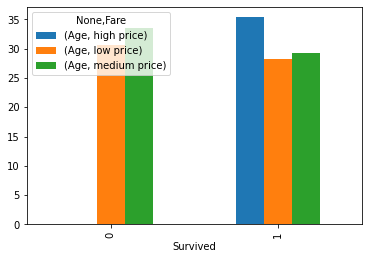

In [29]:
#plotting
joined_table.plot(kind="bar")

**8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування? Оберіть правильні твердження:**
- В середньому чоловіки 1-го класу старші 40 років
- В середньому жінки 1-го класу старші 40 років
- Чоловіки всіх класів в середньому старші жінок того ж класу
- В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу



In [30]:
# Ваш код тут
#make pivot table
data.pivot_table(index=["Sex"], columns=["Pclass"], values=["Age"], aggfunc=np.mean)

Age                      
Pclass          1          2          3
Sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589